# Creating a predictive model from our world in data.
Data from [Our world in Data](https://github.com/owid/co2-data?tab=readme-ov-file)

In [1]:
import pandas as pd

df = pd.read_csv("owid-co2-data.csv")
df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualising the data

In [4]:
print(df.columns.tolist())


['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 

In [5]:
selected_columns = [
    'co2',                    # target
    'gdp',
    'population',
    'primary_energy_consumption',
    'energy_per_capita',
    'coal_co2',
    'oil_co2',
    'gas_co2',
    'cement_co2'
]


In [6]:
df_recent = df[df['year'] >= 1990][selected_columns].dropna()


## Visualising the data

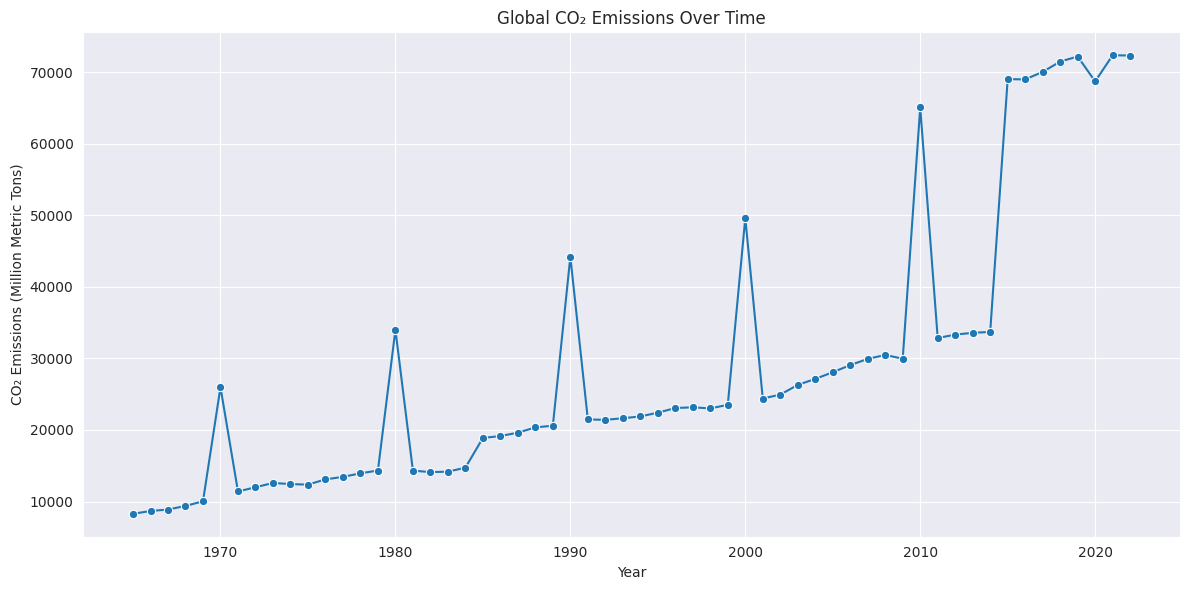

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum CO₂ by year
df_yearly = df_recent.copy()
df_yearly['year'] = df[df['year'] >= 1990]['year']  # ensure 'year' exists
yearly = pd.concat([df['year'], df[selected_columns]], axis=1)
yearly = yearly.dropna()
yearly_total = yearly.groupby('year')['co2'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_total, x='year', y='co2', marker='o')
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Heatmap between features

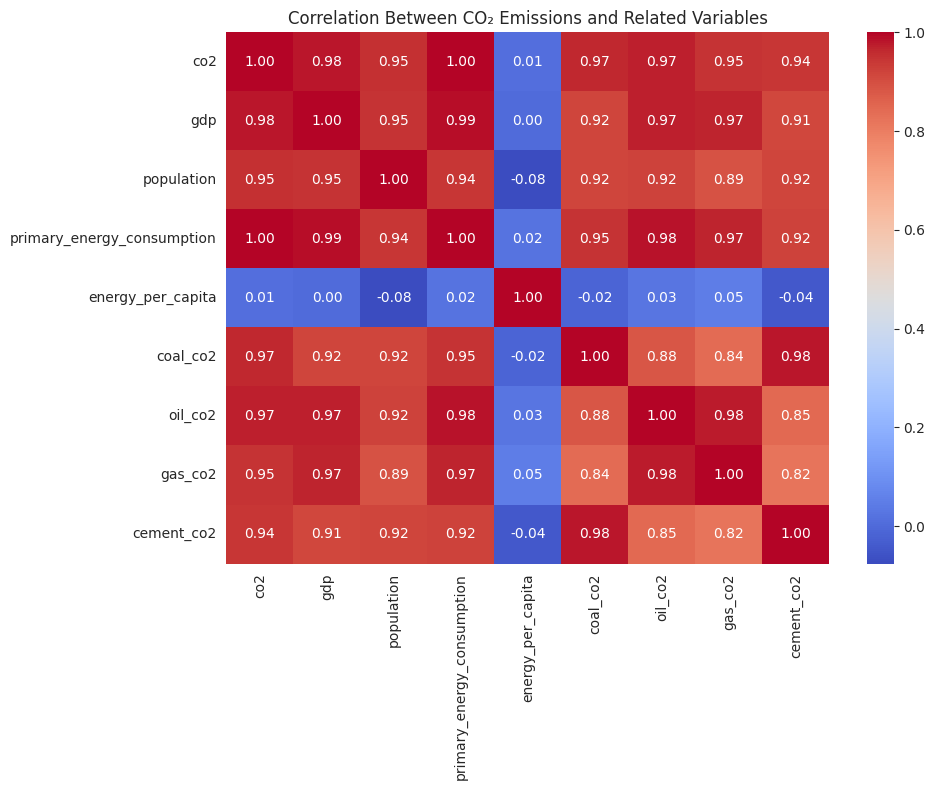

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_recent.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between CO₂ Emissions and Related Variables")
plt.tight_layout()
plt.show()


##  Scatter Plot: GDP vs CO₂ Emissions

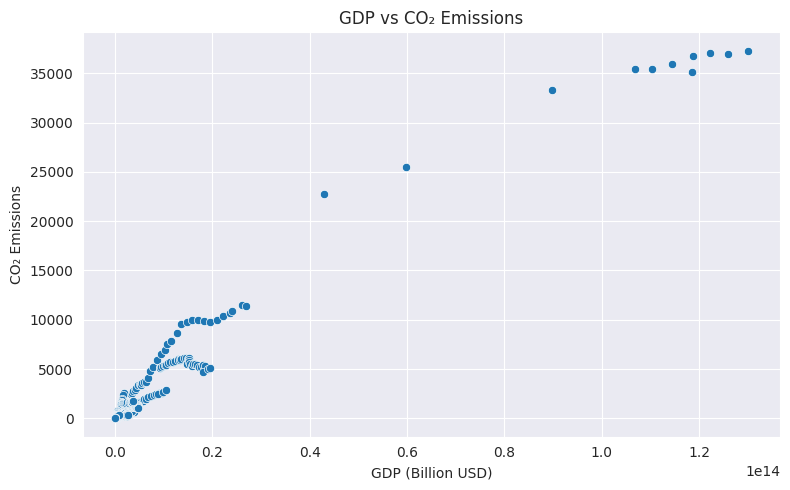

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_recent, x='gdp', y='co2')
plt.title("GDP vs CO₂ Emissions")
plt.xlabel("GDP (Billion USD)")
plt.ylabel("CO₂ Emissions")
plt.tight_layout()
plt.show()


# Building the regression Model

In [10]:
from sklearn.model_selection import train_test_split

X = df_recent.drop(columns=['co2'])  # Features
y = df_recent['co2']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training the model

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# Evaluating the model

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 18.99
RMSE: 42.36
R² Score: 1.00
